## 1. KMeans vs GMM on a Generated Dataset

In the first example we'll look at, we'll generate a Gaussian dataset and attempt to cluster it and see if the clustering matches the original labels of the generated dataset.

We can use sklearn's [make_blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function to create a dataset of Gaussian blobs:

In [1]:
# import resources
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

%matplotlib inline

In [2]:
datasets.make_blobs?

Signature:
datasets.make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)
Docstring:
Generate isotropic Gaussian blobs for clustering.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or array-like, optional (default=100)
    If int, it is the total number of points equally divided among
    clusters.
    If array-like, each element of the sequence indicates
    the number of samples per cluster.

    .. versionchanged:: v0.20
        one can now pass an array-like to the ``n_samples`` parameter

n_features : int, optional (default=2)
    The number of features for each sample.

centers : int or array of shape [n_centers, n_features], optional
    (default=None)
    The number of centers to generate, or the fixed center locations.
    If n_samples is an int and centers is None, 3 centers are generated.

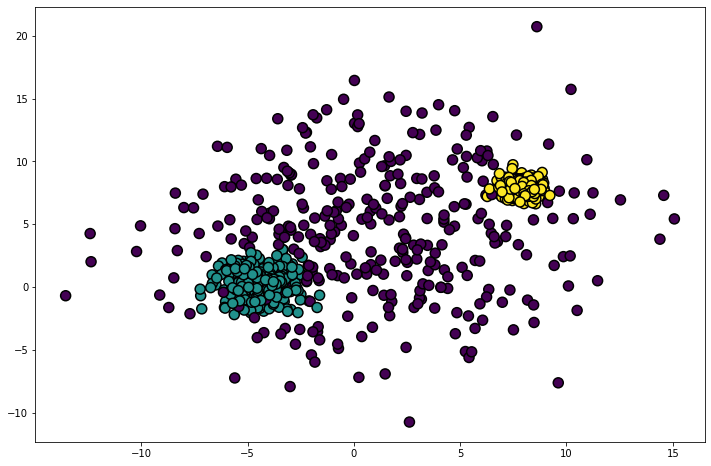

In [3]:
# baseline labelled data
n_samples = 1000

varied = datasets.make_blobs(n_samples, cluster_std=[5, 1, 0.5], random_state=3)

X, y = varied

plt.figure(figsize=(12, 8))
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

Now when we hand off this dataset to the clustering algorithms, we obviously will not pass in the labels. So let's start with KMeans and see how it does with the dataset. Will it be to produce clusters that match the original labels?

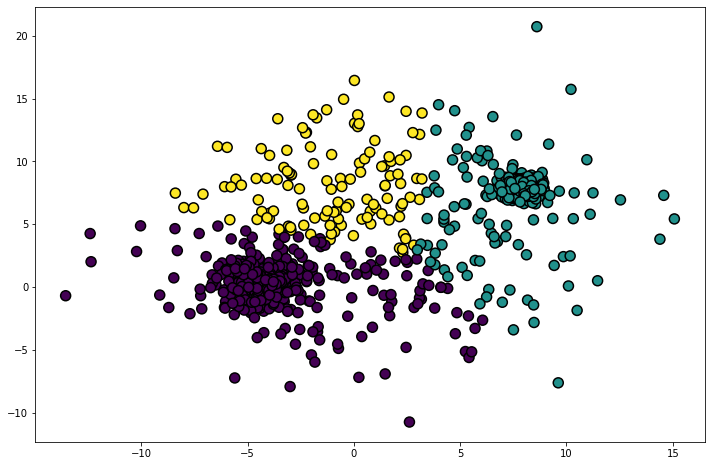

In [4]:
n_clusters = 3
kmeans = KMeans(n_clusters)
preds = kmeans.fit_predict(X)

plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=preds, edgecolors='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

How good of a job did KMeans do? Was it able to find clusters that match or are similar to the original labels?

Let us now try clustering with [GaussianMixture](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html):

In [5]:
GaussianMixture?

Init signature:
GaussianMixture(
    n_components=1,
    *,
    covariance_type='full',
    tol=0.001,
    reg_covar=1e-06,
    max_iter=100,
    n_init=1,
    init_params='kmeans',
    weights_init=None,
    means_init=None,
    precisions_init=None,
    random_state=None,
    warm_start=False,
    verbose=0,
    verbose_interval=10,
)
Docstring:     
Gaussian Mixture.

Representation of a Gaussian mixture model probability distribution.
This class allows to estimate the parameters of a Gaussian mixture
distribution.

Read more in the :ref:`User Guide <gmm>`.

.. versionadded:: 0.18

Parameters
----------
n_components : int, defaults to 1.
    The number of mixture components.

covariance_type : {'full' (default), 'tied', 'diag', 'spherical'}
    String describing the type of covariance parameters to use.
    Must be one of:

    'full'
        each component has its own general covariance matrix
    'tied'
        all components share the same general covariance matrix
    'diag'
   

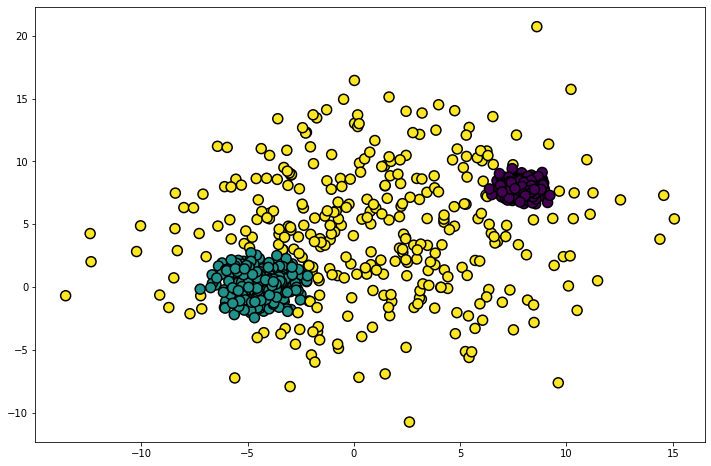

In [7]:
gmm = GaussianMixture(n_components=n_clusters)
pred_gmm = gmm.fit_predict(X)

plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=pred_gmm, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

The Gaussian Mixture Model was able to match the original split almost perfectly.

## 2. KMeans vs GMM on The Iris Dataset

For our second example, we'll take a dataset that has more than two features. The Iris dataset is great for this purpose since it is reasonable to assume it's distributed according to Gaussian distributions.

The Iris dataset is a labeled dataset with four features:

In [8]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


How do you visualize a datset with four dimensions? 

There are a few ways (e.g. [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html), [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), or [project into a lower number number dimensions using PCA](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py)). Let's attempt to visualize using PairGrid because it does not distort the dataset -- it merely plots every pair of features against each other in a subplot:

In [9]:
sns.PairGrid?

Init signature:
sns.PairGrid(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    hue_kws=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    corner=False,
    diag_sharey=True,
    height=2.5,
    aspect=1,
    layout_pad=0.5,
    despine=True,
    dropna=False,
    size=None,
)
Docstring:     
Subplot grid for plotting pairwise relationships in a dataset.

This object maps each variable in a dataset onto a column and row in a
grid of multiple axes. Different axes-level plotting functions can be
used to draw bivariate plots in the upper and lower triangles, and the
the marginal distribution of each variable can be shown on the diagonal.

Several different common plots can be generated in a single line using
:func:`pairplot`. Use :class:`PairGrid` when you need more flexibility.

See the :ref:`tutorial <grid_tutorial>` for more information.
Init docstring:
Initialize the plot figure and PairGrid object.

Parameters
----------
data : DataFrame
    Tidy (long-

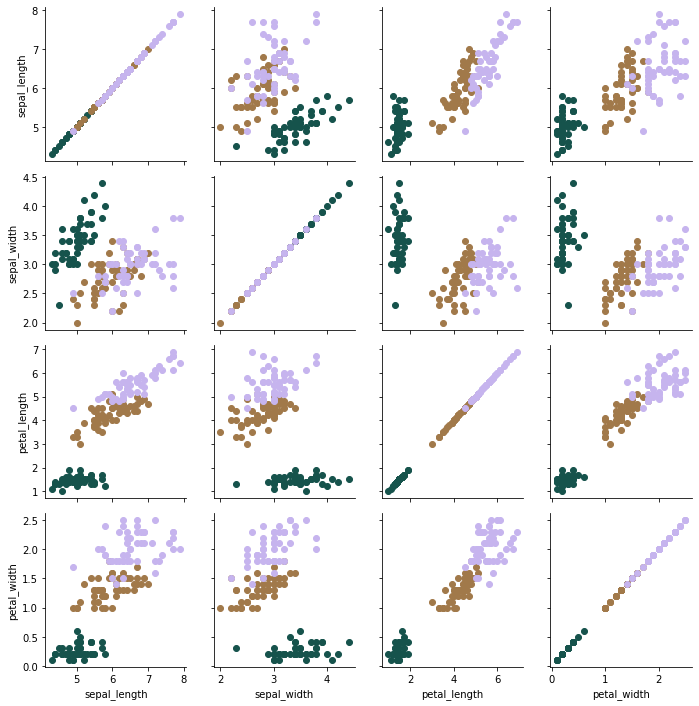

In [10]:
g = sns.PairGrid(iris, hue='species', palette=sns.color_palette('cubehelix', 3))
g.map(plt.scatter)
plt.show()

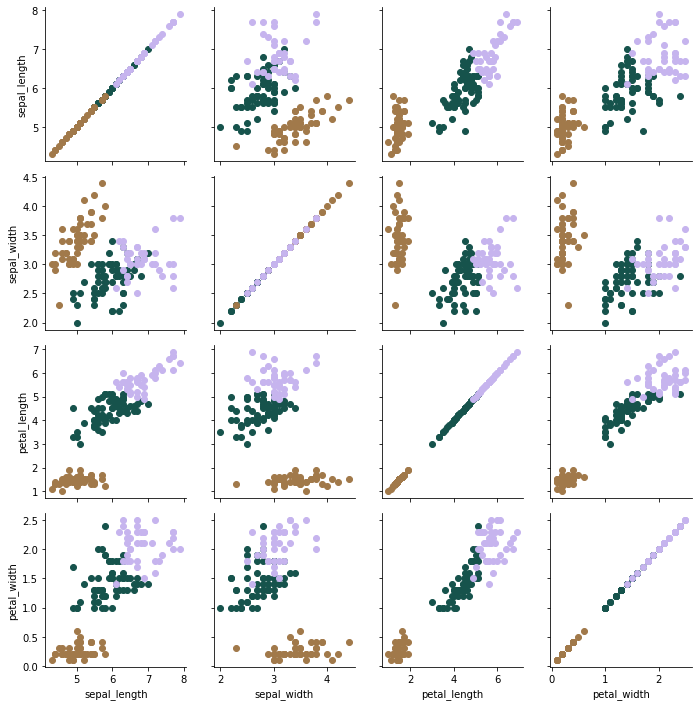

In [11]:
kmeans_iris = KMeans(n_clusters=n_clusters)
pred_kmeans_iris = kmeans_iris.fit_predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

iris['kmeans_pred'] = pred_kmeans_iris

g = sns.PairGrid(iris, hue='kmeans_pred', palette=sns.color_palette('cubehelix', 3))
g.map(plt.scatter)
plt.show()

How do these clusters match the original labels?

You can clearly see that visual inspection is no longer useful if we're working with multiple dimensions like this. So how can we evaluate the clustering result versus the original labels? 

You guessed it. We can use an external cluster validation index such as the [adjusted Rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) which generates a score between -1 and 1 (where an exact match will be scored as 1).

In [17]:
from sklearn.metrics import adjusted_rand_score

iris_kmeans_score = adjusted_rand_score(iris['kmeans_pred'], iris['species'])

iris_kmeans_score

0.7302382722834697

In [18]:
iris_gmm = GaussianMixture(n_components=n_clusters)
gmm_pred = iris_gmm.fit_predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])
iris['gmm_pred'] = gmm_pred

iris_gmm_score = adjusted_rand_score(iris['gmm_pred'], iris['species'])

iris_gmm_score

0.9038742317748124